In [10]:
%load_ext autoreload
%autoreload 2

# it is important to turn on the notebook option
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import dascore as dc
from SpoolProcessing import proc,utils
from MultiResViewer import process,viz

In [4]:
raw_data_path = '/Users/gjin_a/Library/CloudStorage/OneDrive-ColoradoSchoolofMines/Research/Presentations/00 Previous Presentations/202305 DASRCN Workshop/Field Data/DASRCN_hammer'
process_data_path = './processed_data/'


# Define pre-processing function (Optional)


 if the raw data need to be pre-processed before visualizing, you can define a pre-process 
 function here. It is important to include **kargs as the function input. The pre-process function must return
 a dascore patch object.

In [5]:
# In this case, because the data were recorded using Terra15 interrogator in velocity format, a velocity to 
# strain rate conversion is needed. 

def pre_fun(patch, **kargs):
    return patch.tran.velocity_to_strain_rate()

# Run the interactive viewer

**Interactive Shortkeys Manual for MultiResViewer**

The `MultiResViewer` class provides a set of interactive shortcut keys for easy navigation and control of the displayed data. These shortcuts allow you to zoom in on specific data ranges, adjust the color map, and more. Below is a list of available shortcuts and their functions:

1. **'x' Key:** Zoom Mode
   - Press 'x' to enter zoom mode and define the one corner of the zoom range
   - Click at the other corner of the zoom range.
   - The plot will zoom in on the selected range.

2. **'o' Key:** Undo Zoom
   - Press 'o' to undo the most recent zoom operation.
   - This reverts the plot to the previous zoom level.

3. **'O' Key:** Reset Zoom
   - Press 'O' (capital O) to reset the zoom to the initial view.
   - This clears the zoom history and displays the entire dataset.

5. **'-' Key:** Decrease Color Map Range
   - Press the '-' key to decrease the color map range.
   - This narrows the color range, making the data less vivid.

6. **'=' Key:** Increase Color Map Range
   - Press the '=' key to reset the color map range to its default state.
   - This sets the color map range to its original values.

4. **'+' Key:** Increase Color Map Center
   - Press the '+' key to increase the color map range.
   - This expands the color range, making the data more vivid.


7. **'_' Key:** Decrease Color Map Center
   - Press the '_' key to finely decrease the color map range.
   - This allows for precise adjustments to the color map.



<IPython.core.display.Javascript object>


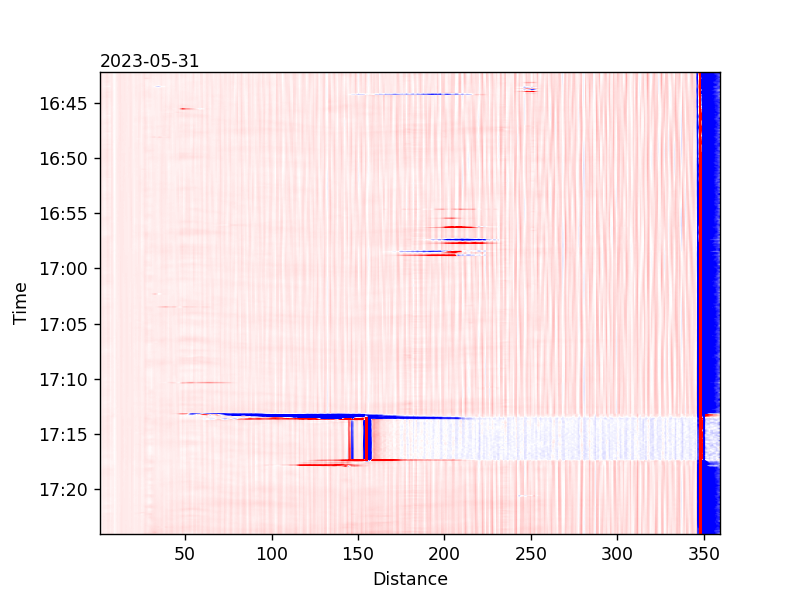

In [9]:
p = viz.MultiResViewer(raw_data_path, process_data_path,scale=0.01,pre_process_for_raw=pre_fun)
plt.show()